# Материалы:
Дашборд: https://public.tableau.com/profile/natalia6929#!/vizhome/Project_final_16160859719610/Dashboard1?publish=yes

Презентация: https://disk.yandex.ru/i/ZgBtwN-60ZIEKA

# E-commerce — Выявление профилей потребления

## 1. Загрузка данных

In [82]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import math as mth
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [83]:
try:
    df = pd.read_csv('/datasets/ecommerce_dataset.csv')

except:
    df = pd.read_csv('ecommerce_dataset.csv')

In [84]:
df.head(50)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


## 2. Предобработка данных

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


В колонках нет пропущенных значений.  
Колонку date необходимо перевести в формат datetime.

In [86]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H') 
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null datetime64[ns]
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


In [88]:
df.duplicated().sum()

0

В файле нет дубликатов.

## 3. Исследовательский анализ данных. 

In [89]:
df.describe()

,order_id,quantity,price
count,6737.000000,6737.000000,6737.000000
mean,43128.948345,2.501559,462.028499
std,27899.414662,15.266478,871.296064
min,12624.000000,1.000000,9.000000
25%,14827.000000,1.000000,101.000000
50%,68503.000000,1.000000,135.000000
75%,70504.000000,1.000000,398.000000
max,73164.000000,1000.000000,14917.000000


Видно, что есть аномальные значения в количестве продуктов (1000) и цене (14917).

Добавим столбец с общей суммой покупки.

In [90]:
df['sum'] = df['quantity'] * df['price']

Проверим на наличие выбросов

In [91]:
df['sum'].describe()

count      6737.000000
mean        720.094998
std        8352.100591
min           9.000000
25%         120.000000
50%         162.000000
75%         600.000000
max      675000.000000
Name: sum, dtype: float64

Присутствует большая сумма покупки, которая искажает распределение данного показателя. 
Посмотрим на распределение суммы покупок по дням без учета данной покупки. 

Text(0.5, 1.0, 'Суммы покупок по дням (без учета выбросов)')

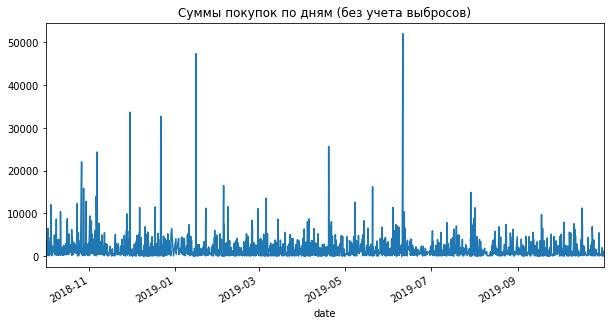

In [92]:
df[df['sum']<675000].groupby('date')['sum'].sum().plot(figsize=(10,5))
plt.title('Суммы покупок по дням (без учета выбросов)')

Суммы покупок по дням очень различаются, пик покупок приходится на Июнь и Февраль.

In [93]:
df.groupby('date')['order_id'].nunique()

date
2018-10-01 00:00:00    1
2018-10-01 08:00:00    2
2018-10-01 09:00:00    1
2018-10-01 11:00:00    1
2018-10-01 12:00:00    1
                      ..
2019-10-31 11:00:00    2
2019-10-31 12:00:00    1
2019-10-31 13:00:00    1
2019-10-31 14:00:00    1
2019-10-31 16:00:00    1
Name: order_id, Length: 2606, dtype: int64

Text(0.5, 1.0, 'Количество заказов по дням')

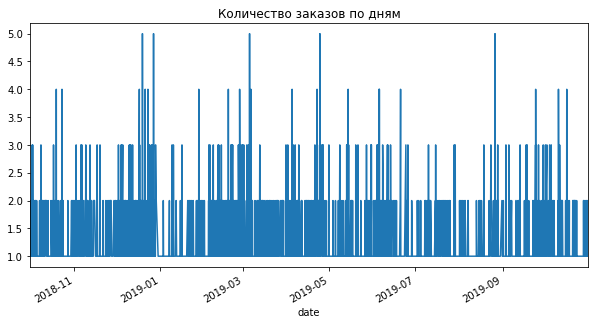

In [94]:
df.groupby('date')['order_id'].nunique().plot(figsize=(10,5))
plt.title('Количество заказов по дням')



По графику видно, что максимальное кол-во покупок осуществлялось в Январе, Марте, Мае и Сентябре 2019 года. 

Text(0.5, 1.0, 'Распределение количества товаров в заказе')

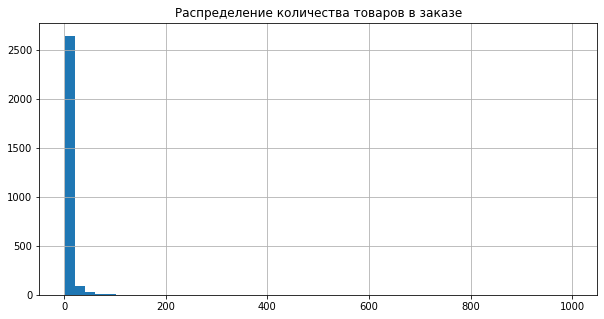

In [96]:
plt.figure(figsize=(10,5))
df.groupby('order_id')['quantity'].sum().hist(bins=50)
plt.title('Распределение количества товаров в заказе')

Большинство заказов содержат менее 10 товаров. 

Text(0.5, 1.0, 'Распределение покупок по сумме')

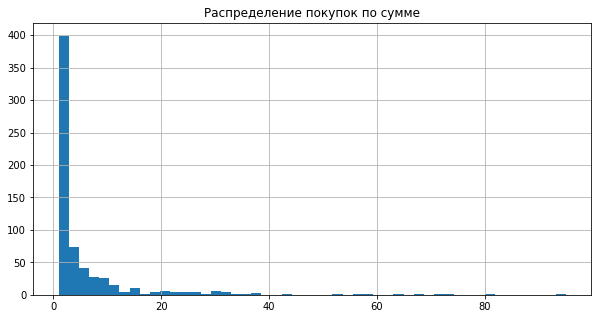

In [97]:
plt.figure(figsize=(10,5))
df.groupby('sum')['order_id'].nunique().hist(bins=50)
plt.title('Распределение покупок по сумме')

Большинство покупок совершается на сумму менее 20 руб.

Text(0.5, 1.0, 'Распределение кол-ва заказов на одного покупателя')

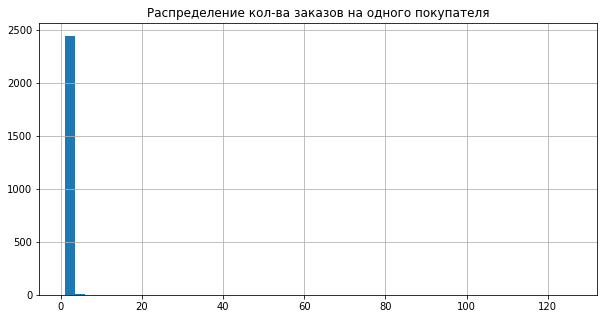

In [98]:
plt.figure(figsize=(10,5))
df.groupby('customer_id')['order_id'].nunique().hist(bins=50)
plt.title('Распределение кол-ва заказов на одного покупателя')

В среднем на одного покупателя приходится менее 5 заказов.

In [100]:
df['customer_id'].nunique()

2451

За анализируемый период было 2451 уникальных покупателей.

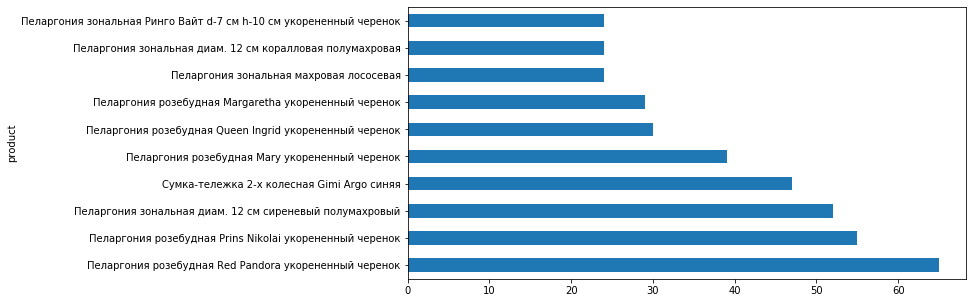

In [101]:
df.groupby('product')['order_id'].nunique().sort_values(ascending=False).head(10).plot(kind="barh", figsize = (10,5))

Наиболее популярный продукт в заказах - Пеларгония. 

In [102]:
df.groupby('customer_id')['order_id'].nunique().sort_values(ascending=False)

customer_id
c971fb21-d54c-4134-938f-16b62ee86d3b    126
4d93d3f6-8b24-403b-a74b-f5173e40d7db     35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58     17
b7b865ab-0735-407f-8d0c-31f74d2806cc      7
0184f535-b60a-4914-a982-231e3f615206      5
                                       ... 
abdc17c8-0813-4b05-9e10-1ffc77eea2d8      1
ab938608-1b5b-4830-9fc0-dfc649c04b2f      1
ab46eafd-f9d3-4f91-af42-794d675d9c0c      1
ab10dfb3-1f3e-4712-972a-729f5cec2eb2      1
000d6849-084e-4d9f-ac03-37174eaf60c4      1
Name: order_id, Length: 2451, dtype: int64

Наибольшее кол-во заказов совершил покупатель - c971fb21-d54c-4134-938f-16b62ee86d3b, далее по убыванию - 4d93d3f6-8b24-403b-a74b-f5173e40d7db и 73d1cd35-5e5f-4629-8cf2-3fda829d4e58.

## 4. Работа с категориями товаров.

## Выделение категорий

In [103]:
df['product'].nunique()

2343

Выделим первое слово из колонки product

In [104]:
df['first_word'] = df['product'].str.split(' ').str[0]
df.head()

,date,customer_id,order_id,product,quantity,price,sum,first_word
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Комнатное
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,Комнатное
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Радермахера
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Хризолидокарпус
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Циперус


In [105]:
df['first_word'].nunique()

461

Получилось 461 уникальное слово. Это в несколько раз меньше, чем 2343.

Так как готового словаря товаров и их категорий я не нашла, сделала в Excel свой собственный, присвоив каждому их 461 слов свою категорию.  
Всего получилось 5 категорий: бытовая техника, хозтовары, растения, посуда, интерьер.

Добавим в таблицу столбец с Категорией. 

In [106]:
category_list = {'бытовая техника': 
                 ['Чайник',
'Миксер',
'Сверло-фреза,',
'Утюг',
'Овощеварка',
'Фен',
'Мантоварка',
'Электроштопор',
'Мантоварка-пароварка',
'Пылесос',
'Сверло',
'Соковарка',
'Соковыжималка'
], 'интерьер':
                 ['Муляж',
'Коврик',
'Цветок',
'Скатерть',
'Ковер',
'Искусственный',
'Простыня',
'Штора',
'Декоративная',
'Подушка',
'Светильник',
'Ковёр',
'Наматрасник',
'Наматрицник-чехол',
'Комод',
'Покрывало',
'Одеяло',
'Фоторамка',
'Этажерка',
'Простынь',
'Махровое',
'Искусственная',
'Кофе',
'Махровый',
'Котовник',
'Наматрацник',
'Наволочка',
'Обувница-3',
'Пододеяльник',
'Стеллаж',
'Двуспальное'
], 'растения': 
                 ['Комнатное',
'Радермахера',
'Хризолидокарпус',
'Циперус',
'Шеффлера',
'Юкка',
'Многолетнее',
'Рассада',
'Герань',
'Пеларгония',
'Суккулент',
'Эхеверия',
'Эвкалипт',
'Адиантум',
'Кампанула',
'Калатея',
'Нолина',
'Хлорофитум',
'Цикламен',
'Глоксиния',
'Азалия',
'Гортензия',
'Хризантема',
'Цветущее',
'Кориандр',
'Иссоп',
'Сантолина',
'Аспарагус',
'Афеляндра',
'Антуриум',
'Молодило',
'Фиалка',
'Гербера',
'Душица',
'Мелисса',
'Роза',
'Бегония',
'Розмарин',
'Альбука',
'Крассула',
'Артемизия',
'Лаванда',
'Мята',
'Каланхое',
'Примула',
'Дендробиум',
'Калоцефалус',
'Каллуна',
'Капсикум',
'Мимоза',
'Соланум',
'Бархатцы',
'Космея',
'Морковь',
'Настурция',
'Огурец',
'Петуния',
'Алиссум',
'Гвоздика',
'Годеция',
'Календула',
'Капуста',
'Кореопсис',
'Лапчатка',
'Львиный',
'Флокс',
'Цинерария',
'Эшшольция',
'Диффенбахия',
'Фаленопсис',
'Подсолнечник',
'Пуансетия',
'Гиностемма',
'Ель',
'Кипарисовик',
'Аптения',
'Новогоднее',
'Пуансеттия',
'Скиммия',
'Фиттония',
'Тимьян',
'Алоэ',
'Спатифиллум',
'Фикус',
'Кодонанта',
'Цикламен,',
'Гимнокалициум',
'Эхинокактус',
'Крокусы',
'Гипсофила',
'Калибрахоа',
'Эпипремнум',
'Аквилегия',
'Базилик',
'Горох',
'Земляника',
'Незабудка',
'Седум',
'Томат',
'Укроп',
'Нефролепис',
'Калла',
'Декабрист',
'Тюльпан',
'Гиацинт',
'Вербена',
'Однолетнее',
'Чабер',
'Бакопа',
'Ранункулус',
'Газания',
'Овсянница',
'Георгина',
'Смолевка',
'Цинния',
'Лавр',
'Вербейник',
'Виола',
'Колокольчик',
'Эхинацея',
'Ясколка',
'Лилейник',
'Папоротник',
'Платикодон',
'Энотера',
'Фуксия',
'Цитрофортунелла',
'Пеперомия',
'Дыня',
'Циния',
'Синнингия',
'Гардения',
'томата',
'Лобелия',
'Табак',
'Девичий',
'Мускари',
'Пиретрум',
'Агератум',
'Колеус',
'Тагетис',
'Цинерания',
'Муррайя',
'Портулак',
'Астра',
'Аргирантерум',
'Левкой',
'Вероника',
'Целозия',
'Арбуз',
'Баклажан',
'Клубника',
'Патиссон',
'Маттиола',
'Сальвия',
'Лук',
'Джункус',
'Драцена',
'Фатсия',
'Хоста',
'Гайлардия',
'Монарда',
'Нивянник',
'Рудбекия',
'Барвинок',
'Осина',
'Сциндапсус',
'Пряные',
'Бузульник',
'Камнеломка',
'Солидаго',
'Физостегия',
'Бадан',
'Лен',
'Лантана',
'Лаватера',
'Анемона',
'Буддлея',
'Валериана',
'Змееголовник',
'Любисток',
'Петрушка',
'Сельдерей',
'Шалфей',
'Вигна',
'Кабачок',
'Тыква',
'Хамедорея',
'Зверобой',
'Мединилла',
'Импатиенс',
'Клен',
'Замиокулькас',
'Амариллис',
'Салат',
'Пахира',
'Литопс'
], 'хозтовары':
                 ['Настенная',
'Чехол',
'Вешалка',
'Сушилка',
'Крючок',
'Корзина',
'Доска',
'Сумка-тележка',
'Щетка-сметка',
'Сумка',
'Ерш',
'Котел',
'Набор',
'Подкладка',
'Дозатор',
'Ёрш',
'Мусорный',
'Плед',
'Перчатки',
'Стремянка',
'Гладильная',
'Лестница-стремянка',
'Тележка',
'Готовая',
'Стяжка',
'Комплект',
'Противень',
'Плечики',
'Полотенце',
'Крепеж',
'Пружина',
'Петля',
'Салфетка',
'Вкладыши',
'Кофр',
'Стиральный',
'Чистящий',
'Щетка',
'Мирт',
'Стремянки',
'Щетка-утюжок',
'Жидкое',
'Пена',
'Подрукавник',
'Контейнер',
'Зубная',
'Карниз',
'Веник',
'Швабра',
'Ящик',
'Подголовник',
'Ведро',
'Короб',
'Коробка',
'Насадка',
'Ножеточка',
'Вешалка-плечики',
'Настольная',
'Сиденье',
'Холодная',
'Сервировочная',
'Шнур',
'Урна',
'Мыло',
'Рыбочистка',
'Сметка',
'Халат',
'Измерительный',
'Линейка,',
'Терка',
'Салфетница',
'Стакан',
'Овощечистка',
'Бальзамин',
'Средство',
'Бензин',
'Паста',
'Петля-стрела',
'Вешалка-стойка',
'Держатель',
'Пробка',
'Измельчитель',
'Вешалки',
'Губка',
'Антижир',
'Универсальное',
'Ролик',
'Сменный',
'Термометр',
'Шило',
'Кухонные',
'Кисточка',
'Скребок',
'Картофелемялка',
'Ароматизированное',
'Бальзам',
'Жестяная',
'Рассекатель',
'Ополаскиватель',
'Сетка',
'Весы',
'Подставка',
'Вешалка-сушилка',
'Ручка-скоба',
'Пресс',
'Мыльница',
'Защитный',
'Многофункциональный',
'Стремянка-табурет',
'Кольца',
'Вантуз',
'Термос',
'Кондиционер',
'Полки',
'Ключница',
'Разделочная',
'Складная',
'Емкость',
'Защитная',
'Гипоаллергенный',
'Вешалка-перекладина',
'Лестница',
'Просеиватель',
'Совок',
'Хлебница',
'Насадка-отжим',
'Нетканые',
'Фал',
'Орехоколка',
'Штанга',
'Увлажняющая',
'Кухонное',
'Подарочный',
'Штангенциркуль',
'Мыло-скраб',
'Скалка',
'Рукав',
'Венчик',
'Сито',
'Концентрат',
'Полка',
'Окномойка',
'Урна-пепельница',
'Сменная',
'Ткань',
'Насадка-моп',
'Подвесное',
'Автоматическая',
'Тряпкодержатель',
'Бельевые',
'Фиксатор-шар',
'Отжим',
'Антинакипин',
'Шпагат',
'Складной',
'Ванна',
'Корзинка',
'Прищепки',
'Отделитель',
'Шприц',
'Крышка',
'Покрытие',
'Веревка',
'Мешок',
'Отбеливатель',
'Завертка',
'Ручка',
'Пьезозажигалка',
'Решетка',
'Запасная',
'Щётка',
'Универсальный',
'Уголок',
'Вакуумный',
'Тряпка',
'Кипятильник',
'Основание',
'Мерный',
'Стяжки',
'Шпингалет'
], 'посуда':
                 ['Таз',
'Мини-сковорода',
'Сковорода',
'Стеклянная',
'Тарелка',
'Вилка',
'Ложка',
'Нож',
'Набор',
'Кувшин',
'Толкушка',
'Банка',
'Tepмокружка',
'Масленка',
'Корыто',
'Салатник',
'Чайный',
'Кружка',
'Лопатка',
'Стакан',
'Столовая',
'Чайная',
'Лоток',
'Ковш',
'Миска',
'Термостакан',
'Термокружка',
'Фарфоровая',
'Столовый',
'Блюдце',
'Бульонница',
'Модульная',
'Кастрюля',
'Чайник',
'Форма',
'Бак',
'Тортница',
'Блюдо',
'Сотейник',
'Бидон',
'Ваза',
'Сахарница',
'Половник'
]    
}

In [107]:
def category_func(name):
    for key, value in category_list.items():
        for word in value:
            if name.find(word) > -1:
                return key
   

In [108]:
df['category'] = df['first_word'].apply(category_func)

In [109]:
df.head(50)

,date,customer_id,order_id,product,quantity,price,sum,first_word,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Комнатное,растения
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,Комнатное,растения
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Радермахера,растения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Хризолидокарпус,растения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Циперус,растения
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,164.0,Шеффлера,растения
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,Юкка,растения
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,Настенная,хозтовары
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,269.0,Таз,посуда
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,674.0,Чехол,хозтовары


## Анализ дохода и сезонности внутри каждой категории

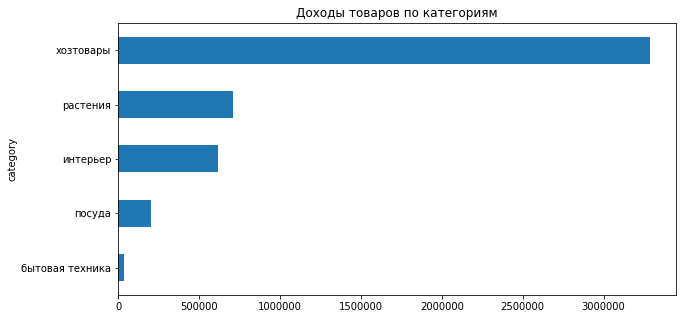

In [110]:
df.groupby('category')['sum'].sum().sort_values().plot(kind="barh", figsize = (10,5), title='Доходы товаров по категориям')

Больше всего приносит доход Хозтовары, меньше всего - Бытовая техника.

In [111]:
df['month'] = df['date'].dt.month

In [112]:
df.head()

,date,customer_id,order_id,product,quantity,price,sum,first_word,category,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,Комнатное,растения,10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,Комнатное,растения,10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Радермахера,растения,10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,Хризолидокарпус,растения,10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,Циперус,растения,10


In [113]:
def category_sales(name):
    df[df['category']==name].groupby('date')['sum'].sum().plot(figsize = (10,5))
    plt.title('Продажи категории ' + name +  ' по месяцам')


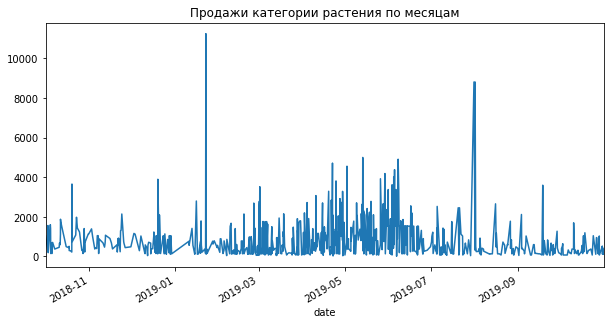

In [114]:
category_sales('растения')

Наибольшие продажи категории Растения осуществляются в феврале (покупка семян) и в августе. 

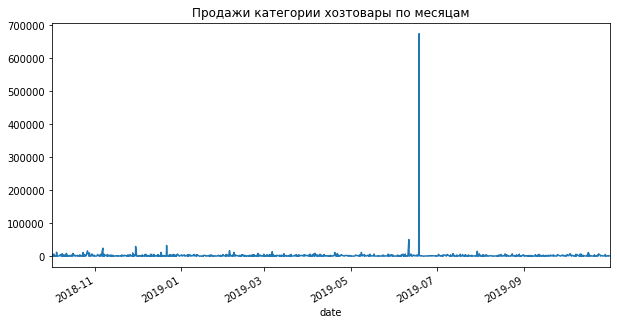

In [115]:
category_sales('хозтовары')

В категории Хозтовары выявилась аномальная покупка в Июле.

In [116]:
df[(df['sum']>600000) & (df['category']=='хозтовары')]

,date,customer_id,order_id,product,quantity,price,sum,first_word,category,month
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0,675000.0,Вантуз,хозтовары,6


18 июня была совершена закупка 1000 вантузов. Скорее всего, это был оптовый покупатель. 

Построим распределение без учета данной покупки.

Text(0.5, 1.0, 'Продажи категории хозтовары по месяцам')

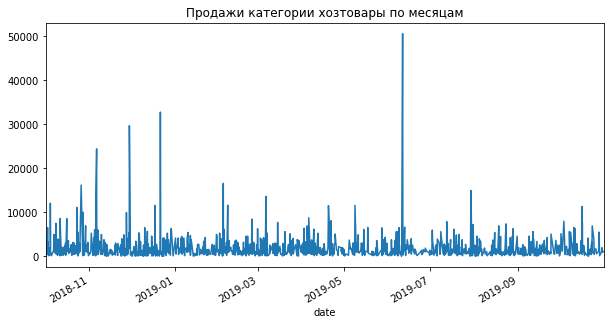

In [117]:
df[(df['category']=='хозтовары') & (df['sum']<200000)].groupby('date')['sum'].sum().plot(figsize = (10,5))
plt.title('Продажи категории хозтовары по месяцам')

Самые большие покупки хозтоваров осуществляются в Июле (разгар дачного сезона), а также в Декабре и Январе (возможно связано с выпавшим снегом).

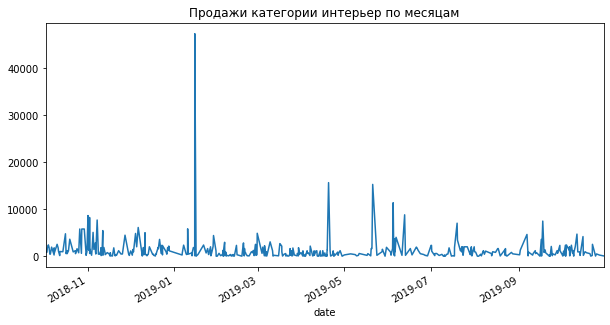

In [118]:
category_sales('интерьер')

В категории Интерьер была аномальная закупка в Январе. 

In [119]:
df[(df['sum']>40000) & (df['category']=='интерьер')]

,date,customer_id,order_id,product,quantity,price,sum,first_word,category,month
1518,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755.0,47385.0,Простынь,интерьер,1


15 января купили 27 простыней. Вероятно, это была оптовая покупка. 

Построим распределение без учета данной покупки.

Text(0.5, 1.0, 'Продажи категории хозтовары по месяцам')

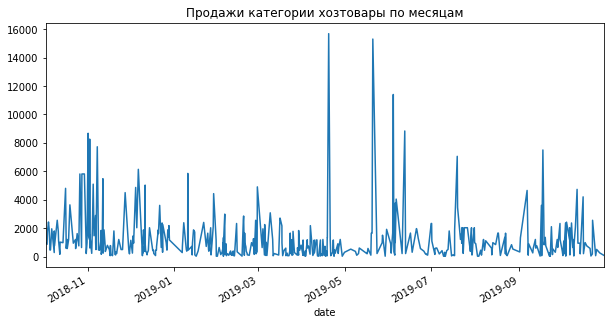

In [120]:
df[(df['category']=='интерьер') & (df['sum']<40000)].groupby('date')['sum'].sum().plot(figsize = (10,5))
plt.title('Продажи категории хозтовары по месяцам')

Наибольшие закупки в категории Иньерьер происходили в Мае и Июне. Наименьшие - в Апреле. 

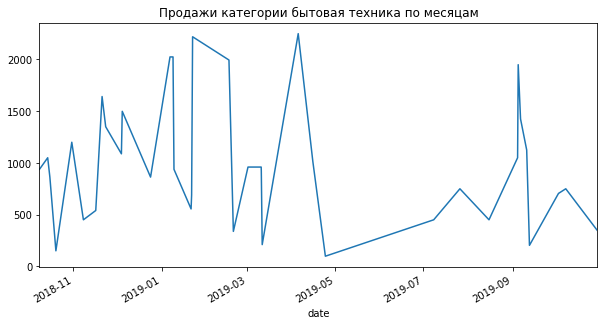

In [121]:
category_sales('бытовая техника')

Продажи бытовой техники очень волатильные в течение года. Выделяются наибольшие пики в Мае, Феврале и Сентябре. 

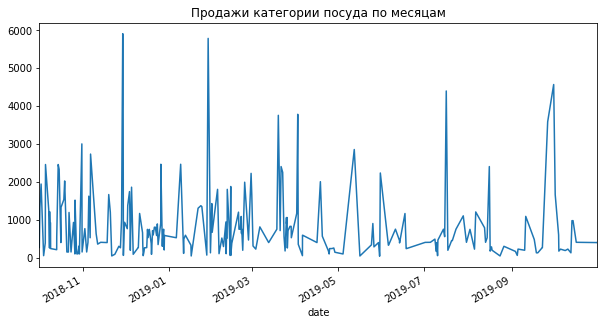

In [122]:
category_sales('посуда')

Наибольшие продажи категории Посуда происходили в Декабре (подарки на Новый год), Феврале, Июле и Октябре. 

# 5. Сегментация покупателей

### Сегментация покупателей, используя анализ RFM (Recency, Frequency, Monetary). 

In [123]:
#df_new=df[['date', 'customer_id', 'order_id', 'sum']]
df_new = df[df['sum']<675000][['date', 'customer_id', 'order_id', 'sum']]

In [124]:
df_new.head()

,date,customer_id,order_id,sum
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,112.0


Для Recency посчитаем количество дней между текущей датой и датой последней покупки по каждому покупателю.  
Для Frequency посчитаем количество заказов на каждого покупателя.  
Для Monetary посчитаем выручку по каждому покупателю. 

In [125]:
PRESENT = dt.datetime(2021,3,20)

In [126]:
rfm = df_new.groupby('customer_id').agg({'date': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: num.nunique(),
                                        'sum': lambda price: price.sum()})

In [129]:
rfm.head()

,date,order_id,sum
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,520,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,762,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,522,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,782,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,537,1,2324.0


In [130]:
rfm.columns

Index(['date', 'order_id', 'sum'], dtype='object')

Изменим названия колонок

In [131]:
rfm.columns=['recency', 'frequency', 'monetary']

In [132]:
rfm.head()

,recency,frequency,monetary
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,520,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,762,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,522,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,782,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,537,1,2324.0


Будем считать самыми важными клиентами тех, кто недавно купил, кто чаще всего покупает и больше всего тратит.  
Для ранжирования покупателей будем использовать функцию qcut(), которая позволяет распределить значения по полуинтервалам, так чтобы количество значений, попавших в каждый, было одинаковым.

In [133]:
rfm['r_quartile'] = pd.qcut(rfm['recency'].rank(method='first'), 3, ['1','2', '3'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), 3, ['3', '2', '1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'].rank(method='first'), 3, ['3', '2','1'])

In [134]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,520,1,555.0,1,3,2
001cee7f-0b29-4716-b202-0042213ab038,762,1,442.0,2,3,3
00299f34-5385-4d13-9aea-c80b81658e1b,522,1,914.0,1,3,2
002d4d3a-4a59-406b-86ec-c3314357e498,782,1,1649.0,3,3,1
003bbd39-0000-41ff-b7f9-2ddaec152037,537,1,2324.0,1,3,1


Объединим все три квартиля в одном столбце, чтобы отнести каждого покупателя к определенной группе. 

In [135]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
customer_id,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,520,1,555.0,1,3,2,132
001cee7f-0b29-4716-b202-0042213ab038,762,1,442.0,2,3,3,233
00299f34-5385-4d13-9aea-c80b81658e1b,522,1,914.0,1,3,2,132
002d4d3a-4a59-406b-86ec-c3314357e498,782,1,1649.0,3,3,1,331
003bbd39-0000-41ff-b7f9-2ddaec152037,537,1,2324.0,1,3,1,131


Опишем полученные сегменты покупателей:
- 111 — самые активные, часто и много покупающие клиенты. С такими необходимо работать персонально: предлагать что-то ценное;
- х1х — покупают немного, но постоянно. Необходимо предлагать сопутствующие товары, бонусную карту или участие в программе лояльности. Необходимо сделать так, чтобы эти потребители стали больше тратить;
- хх1 — покупают редко, но зато на большие суммы. Нужно предлагать таким клиентам нечто ценное или особенное. Важен индивидуальный подход, чтобы подтолкнуть крупных потребителей на более частые покупки;
- 13х — новые клиенты, которые в будущем могут стать лояльными. Наладить как можно больше коммуникаций, чтобы сделать из них лояльных покупателей;
- 33х — старые клиенты, активность которых снизилась. Выяснить, почему они перестали совершать покупки.
- 333 — потерянные клиенты, которые давно не проявляли активность. Попробовать наладить контакт, предложить скидки или специальные предложения.

Отфильтруем данные, чтобы выявить наиболее выгодных покупателей. 

In [136]:
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
customer_id,,,,,,,
db77c238-3c80-4032-9e3c-c30a43f4a650,650,1,23660.0,1,1,1,111
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,505,17,21713.0,1,1,1,111
940c175f-ea87-44e0-9e16-0a3d0a9abecd,646,2,20232.0,1,1,1,111
126dac4d-6486-49ed-a1be-9fd55a38a9de,569,2,9148.0,1,1,1,111
7abce1cc-bc8c-4362-b61a-0cbb4822ed29,533,2,7950.0,1,1,1,111


### Сегментация покупателей на основе товарных категорий

Для сегментации покупателей будем использовать алгоритм K-Means. Данный алгоритм группирует объекты пошагово. Алгоритм основан на предположении, что число кластеров (групп) заранее известно.  
Основным достоинством алгоритма является его простота. Простота обычно означает высокую скорость выполнения и эффективность по сравнению с другими алгоритмами, в особенности при работе с крупными наборами данных.

In [137]:
customers = pd.DataFrame({'customer_id':df['customer_id'].unique()})
customers.head()

,customer_id
0,ee47d746-6d2f-4d3c-9622-c31412542920
1,375e0724-f033-4c76-b579-84969cf38ee2
2,6644e5b4-9934-4863-9778-aaa125207701
3,c971fb21-d54c-4134-938f-16b62ee86d3b
4,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c


Создадим колонки под каждую категорию товаров: бытовая техника, хозтовары, растения, посуда, интерьер.

In [138]:
customers['бытовая техника'] = 0
customers['хозтовары'] = 0
customers['растения'] = 0
customers['посуда'] = 0
customers['интерьер'] = 0
customers.head()

,customer_id,бытовая техника,хозтовары,растения,посуда,интерьер
0,ee47d746-6d2f-4d3c-9622-c31412542920,0,0,0,0,0
1,375e0724-f033-4c76-b579-84969cf38ee2,0,0,0,0,0
2,6644e5b4-9934-4863-9778-aaa125207701,0,0,0,0,0
3,c971fb21-d54c-4134-938f-16b62ee86d3b,0,0,0,0,0
4,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,0,0,0,0,0


Для каждого покупателя добавим данные, сколько он потратил на каждую из товарных категорий. 

In [139]:
from tqdm import tqdm
for index in tqdm(range(len(df))):
    customerID = df.loc[index,'customer_id']
    product_category = df.loc[index,'category']
    product_price = df.loc[index,'sum']
    customers_table_index = customers[customers['customer_id']==customerID].index[0]
    customers.loc[customers_table_index, str(product_category)] += product_price

100%|██████████| 6737/6737 [00:13<00:00, 487.76it/s]


In [140]:
customers

,customer_id,бытовая техника,хозтовары,растения,посуда,интерьер
0,ee47d746-6d2f-4d3c-9622-c31412542920,0.0,0.0,1037.0,0.0,0.0
1,375e0724-f033-4c76-b579-84969cf38ee2,0.0,824.0,0.0,0.0,0.0
2,6644e5b4-9934-4863-9778-aaa125207701,0.0,0.0,0.0,269.0,0.0
3,c971fb21-d54c-4134-938f-16b62ee86d3b,1401.0,131330.0,10759.0,5155.0,18343.0
4,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,0.0,820.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2446,b24b3075-bbb5-498c-add9-534a727f3c33,0.0,0.0,314.0,0.0,0.0
2447,6ddd4081-515e-401a-9567-8c0eab6dc868,0.0,0.0,112.0,0.0,0.0
2448,f17ed857-178e-45e1-a662-0a9dd3b58c5f,0.0,0.0,329.0,0.0,0.0
2449,1f0a7f35-7459-4f23-b468-5e45bf481dd1,0.0,1087.0,0.0,0.0,0.0


Посмотрим аномальные закупки по каждой категории, чтобы их исключить при формировании кластеров. 

In [141]:
customers.sort_values(by='бытовая техника', ascending=False)

,customer_id,бытовая техника,хозтовары,растения,посуда,интерьер
611,4809bbb1-f942-40ac-b666-7b8c771d279e,4048.0,0.0,0.0,0.0,0.0
1260,b3a6914b-7e47-4188-af3d-2eab2f3c18e7,2249.0,0.0,0.0,0.0,0.0
687,f6503cb7-d28a-4704-8495-c791bd702471,2219.0,0.0,0.0,0.0,0.0
863,c41cd9ac-1385-430b-ac97-f4613802e16d,1994.0,0.0,0.0,0.0,0.0
2124,c75052a0-1bd3-40b4-8c41-05208207f79e,1949.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
825,dcd0d529-cf79-4d8f-94fa-8537020e9f39,0.0,232.0,0.0,0.0,0.0
826,dc32eaf5-9f05-48ea-a5aa-bbf72ca1a4ad,0.0,1087.0,0.0,0.0,0.0
827,cbb1c6ab-1223-438f-af51-bfbc6c833996,0.0,0.0,0.0,0.0,66.0
828,b9ba737c-cc1a-4d03-b569-478bde694b5b,0.0,1122.0,0.0,0.0,0.0


В категории Бытовая техника нет аномальных закупок. 

In [142]:
customers.sort_values(by='хозтовары', ascending=False)

,customer_id,бытовая техника,хозтовары,растения,посуда,интерьер
1718,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,0.0,675000.0,0.0,0.0,0.0
3,c971fb21-d54c-4134-938f-16b62ee86d3b,1401.0,131330.0,10759.0,5155.0,18343.0
1221,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,0.0,65220.0,0.0,0.0,0.0
1677,146cd9bf-a95c-4afb-915b-5f6684b17444,0.0,49432.0,0.0,0.0,0.0
6,4d93d3f6-8b24-403b-a74b-f5173e40d7db,1799.0,45449.0,1786.0,2132.0,9662.0
...,...,...,...,...,...,...
1186,caa57afd-dc3d-4098-b68b-f7de931e8149,0.0,0.0,0.0,0.0,280.0
1185,c816fd3d-3783-4fd8-aeab-0e99fab4eb58,0.0,0.0,134.0,0.0,0.0
1183,7d0641a6-e043-487d-b356-38895fe7df84,0.0,0.0,268.0,254.0,0.0
1181,22749361-d927-47e6-a6ad-aee8becdb094,0.0,0.0,0.0,0.0,1770.0


В категории Хозтовары присутствует аномальная закупка у покупателя '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6' на сумму 675000 руб. и у покупателя 'c971fb21-d54c-4134-938f-16b62ee86d3b' на сумму 131330 руб.

In [143]:
customers.sort_values(by='растения', ascending=False)

,customer_id,бытовая техника,хозтовары,растения,посуда,интерьер
1607,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,0.0,0.0,114750.0,0.0,0.0
1609,db77c238-3c80-4032-9e3c-c30a43f4a650,0.0,0.0,23660.0,0.0,0.0
1944,794e66f5-4d30-4860-b44c-903c9f58127f,0.0,0.0,17620.0,0.0,0.0
689,6be74251-7159-4cc0-99fb-d034a17c61b0,0.0,0.0,11250.0,0.0,0.0
3,c971fb21-d54c-4134-938f-16b62ee86d3b,1401.0,131330.0,10759.0,5155.0,18343.0
...,...,...,...,...,...,...
1170,5bee7748-a089-4d7c-a1ad-075cd8846a41,0.0,14396.0,0.0,0.0,0.0
1168,9bef13ff-33fc-4bf5-8718-96f1db490e3b,0.0,0.0,0.0,0.0,104.0
1167,62c160e8-8ce7-4dd2-84b7-f74bf90b1e40,0.0,0.0,0.0,0.0,1180.0
1166,cf7b5d73-9cad-4a40-9937-2c53a98292da,0.0,149.0,0.0,0.0,0.0


В категории Растения присутствует аномальная закупка у покупателя '1d6c8c1f-a799-4418-9af2-1ded47d7a85c' на сумму 114750 руб. 

In [144]:
customers.sort_values(by='посуда', ascending=False)

,customer_id,бытовая техника,хозтовары,растения,посуда,интерьер
726,0a29b892-f32e-483a-871c-d05bb91bbb95,0.0,0.0,0.0,5775.0,0.0
37,552e17df-ba16-4e66-84fb-55a5557a6bea,0.0,0.0,0.0,5398.0,0.0
350,b3ef8c7f-a9c5-4567-888a-6807395128d2,0.0,0.0,0.0,5160.0,0.0
3,c971fb21-d54c-4134-938f-16b62ee86d3b,1401.0,131330.0,10759.0,5155.0,18343.0
561,ea741fdc-4883-4fc1-a34e-a8bcf8dc6cbb,0.0,0.0,0.0,4920.0,0.0
...,...,...,...,...,...,...
875,051d78d4-3667-4018-90d5-2e7ae8c98816,0.0,727.0,0.0,0.0,0.0
876,b82cde72-d445-40f6-ac48-3b5714ee7b45,0.0,562.0,0.0,0.0,0.0
877,8e21d4cb-760e-430a-a3c6-f3af35114bf3,0.0,0.0,540.0,0.0,0.0
879,b30727a5-2f84-418e-914f-385491af319d,0.0,560.0,0.0,0.0,0.0


В категории Посуда нет аномальных закупок.

In [145]:
customers.sort_values(by='интерьер', ascending=False)

,customer_id,бытовая техника,хозтовары,растения,посуда,интерьер
625,58a4c3cc-504f-43ea-a74a-bae19e665552,0.0,0.0,0.0,0.0,53232.0
1363,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,0.0,11460.0,0.0,564.0,29876.0
1633,940c175f-ea87-44e0-9e16-0a3d0a9abecd,0.0,0.0,0.0,0.0,20232.0
3,c971fb21-d54c-4134-938f-16b62ee86d3b,1401.0,131330.0,10759.0,5155.0,18343.0
147,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,0.0,33055.0,0.0,291.0,17424.0
...,...,...,...,...,...,...
891,28752219-4984-4be5-9892-0114068c6b61,0.0,0.0,0.0,1198.0,0.0
889,ec56668f-73aa-47d3-86c5-35cb125c056b,0.0,492.0,0.0,0.0,0.0
887,ba82101c-f638-4f89-a7da-35875c710a79,0.0,1087.0,0.0,0.0,0.0
885,4fcbf939-7206-488d-b45d-48fc777c1c83,0.0,0.0,135.0,0.0,0.0


В категории Интерьер нет аномальных закупок. 

Уберем у покупателей, совершивших аномальные закупки. С ними необходимо работать индивидуально.

In [146]:
customers_upd = customers[(customers['customer_id'] != '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6') & (customers['customer_id'] !='1d6c8c1f-a799-4418-9af2-1ded47d7a85c') & (customers['customer_id'] !='c971fb21-d54c-4134-938f-16b62ee86d3b')]

Необходимо убрать колонку Customer_id, так как fit_transform не работает с форматом String.

In [147]:
customers_new = customers_upd.drop('customer_id', 1)

Поскольку K-среднее зависит от расстояния, нам необходимо масштабировать данные. Это означает, что все показателии нужно выставлять по шкале от -1 до 1. 

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(customers_new)

In [149]:
scaled_customers = pd.DataFrame(scaled_customers, columns=customers_new.columns)
scaled_customers

,бытовая техника,хозтовары,растения,посуда,интерьер
0,-0.094941,-0.336490,0.891496,-0.191821,-0.154464
1,-0.094941,-0.062584,-0.265395,-0.191821,-0.154464
2,-0.094941,-0.336490,-0.265395,0.438929,-0.154464
3,-0.094941,-0.063914,-0.265395,-0.191821,-0.154464
4,-0.094941,-0.132390,-0.265395,-0.191821,-0.154464
...,...,...,...,...,...
2443,-0.094941,-0.336490,0.084908,-0.191821,-0.154464
2444,-0.094941,-0.336490,-0.140446,-0.191821,-0.154464
2445,-0.094941,-0.336490,0.101642,-0.191821,-0.154464
2446,-0.094941,0.024839,-0.265395,-0.191821,-0.154464


Задаём модель k_means с числом кластеров 3.

In [150]:
km = KMeans(n_clusters = 3)

Прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)

In [151]:
labels =  km.fit_predict(scaled_customers)

Сохраняем метки кластера в поле нашего датасета

In [152]:
customers_new['cluster'] = labels

In [153]:
customers_new['cluster'].value_counts()

0    2387
2      40
1      21
Name: cluster, dtype: int64

98% покупателей попали в нулевой кластер

In [154]:
customers_new

,бытовая техника,хозтовары,растения,посуда,интерьер,cluster
0,0.0,0.0,1037.0,0.0,0.0,0
1,0.0,824.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,269.0,0.0,0
4,0.0,820.0,0.0,0.0,0.0,0
5,0.0,614.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
2446,0.0,0.0,314.0,0.0,0.0,0
2447,0.0,0.0,112.0,0.0,0.0,0
2448,0.0,0.0,329.0,0.0,0.0,0
2449,0.0,1087.0,0.0,0.0,0.0,0


In [155]:
customers_new.groupby(['cluster']).mean()

,бытовая техника,хозтовары,растения,посуда,интерьер
cluster,,,,,
0,1.959363,997.700461,243.050272,33.487222,246.02765
1,1520.000000,3085.904762,104.619048,241.761905,476.47619
2,0.000000,793.350000,0.000000,2881.325000,0.00000


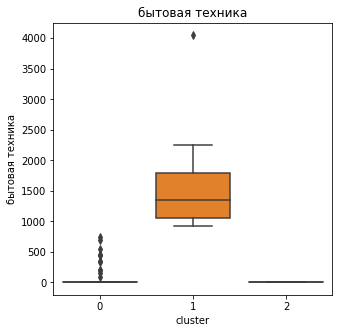

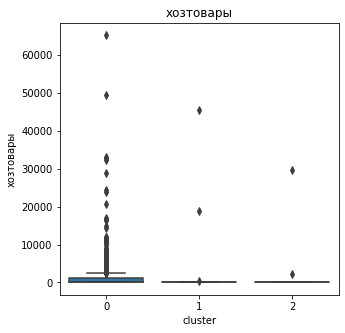

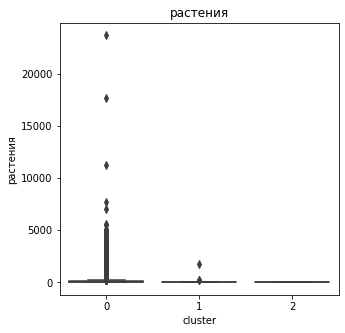

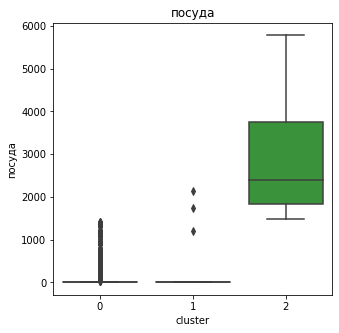

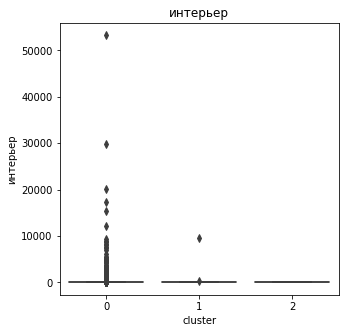

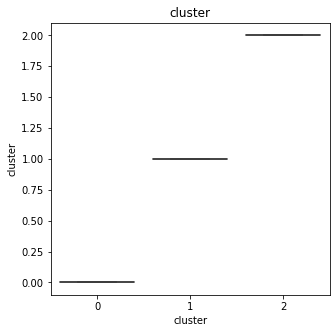

In [156]:
for column in customers_new.columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = customers_new[column], data=customers_new)
    plt.title(column)
    plt.show()

Отличительные признаки кластеров:  
    - 0 кластер характеризуется наибольшими покупками в категории Хозтовары, наименьшие покупки в категории Бытовая техника;
    - 1 кластер характеризуется наибольшими покупками в категории Посуда и Хозтовары. Нет покупок категорий: Бытовая техника, Растения, Интерьер;  
    - 2 кластер характеризуется наибольшими покупками в категории Хозтовары. Наименьшие покупки в категории Растения.

# 7. Формулирование и проверка гипотез

Добавим в таблицу customers_new столбец sum (сумма всех покупок).

In [157]:
customers_new['sum'] = customers_new['бытовая техника'] + customers_new['интерьер'] + customers_new['посуда'] + customers_new['растения'] + customers_new['хозтовары']

In [158]:
customers_new.groupby(['cluster']).mean()

,бытовая техника,хозтовары,растения,посуда,интерьер,sum
cluster,,,,,,
0,1.959363,997.700461,243.050272,33.487222,246.02765,1522.224969
1,1520.000000,3085.904762,104.619048,241.761905,476.47619,5428.761905
2,0.000000,793.350000,0.000000,2881.325000,0.00000,3674.675000


Сформируем гипотезы:

Нулевая гипотеза (H0) - Статистически значимых различий в средней сумме покупок между кластерами нет.  
Альтернативная гипотеза (H1) - Суммы средних покупок у кластеров различаются.  
Уровень статистической значимости - 0.05

In [159]:
print("{0:.3f}".format(stats.mannwhitneyu(customers_new[customers_new['cluster']=='0']['sum'], customers_new[customers_new['cluster']=='1']['sum'])[1]))


0.000


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [160]:
print("{0:.3f}".format(stats.mannwhitneyu(customers_new[customers_new['cluster']=='1']['sum'], customers_new[customers_new['cluster']=='2']['sum'])[1]))


0.000


P-value практически нулевое. Это означает, что сумма среднего чека у кластеров отличается значительно.

# 8. Выводы

Мы подготовили анализ данных интернет-магазина товаров для дома и быта «Пока все ещё тут».  

Мы загрузили данные, убедились, что в колонках нет пропущенных значений.  
Колонку date перевели в формат datetime.  
Проверили, что в файле нет дубликатов.

Далее мы проверил исследователький анализ данных.   
Обнаружили, что есть аномальные значения в количестве продуктов (1000) и цене (14917).  
Максимальное кол-во покупок осуществлялось в Январе, Марте, Мае и Сентябре 2019 года.
За анализируемый период было 2451 уникальных покупателей.  
Добавив столбец с общей суммой покупки, обнаружили,что присутствует большая сумма покупки, которая искажает распределение данного показателя. Убрав данный выброс, увидели, что суммы покупок по дням очень различаются, пик покупок приходится на Ноябрь. 
Большинство покупок совершается на сумму менее 20 руб.  
Наиболее популярный продукт в заказах - Пеларгония. В среднем приходится по 1 заказу на покупателя.

Далее мы проверили работу с категориями товаров. 
Мы выделили первое слово из колонки product. Получилось 461 уникальное слово. Сделали в Excel словарь категорий товаров, присвоив каждому их 461 слов свою категорию.  
Всего получилось 5 категорий: бытовая техника, хозтовары, растения, посуда, интерьер.
Проверили анализ дохода и сезонности внутри каждой категории.  
Больше всего приносит доход Хозтовары, меньше всего - Бытовая техника.
Наибольшие продажи категории Растения осуществляются в феврале (покупка семян) и в августе.  
В категории Хозтовары выявилась аномальная покупка в Июле. Построили распределение без учета данной покупки. Самые большие покупки хозтоваров осуществляются в Июле (разгар дачного сезона), а также в Декабре и Январе (возможно связано с выпавшим снегом).  
В категории Интерьер была аномальная закупка в Январе. Построили распределение без учета данной покупки. Наибольшие закупки в категории Иньерьер происходили в Мае и Июне. Наименьшие - в Апреле.  
Продажи бытовой техники очень волатильные в течение года. Выделяются наибольшие пики в Мае, Феврале и Сентябре.  
Наибольшие продажи категории Посуда происходили в Декабре (подарки на Новый год), Феврале, Июле и Октябре.  

Мы провели сегментацию покупателей двумя способами:  
1) Используя анализ RFM (Recency, Frequency, Monetary). Получили следующие сегменты:
- 111 — самые активные, часто и много покупающие клиенты. С такими необходимо работать персонально: предлагать что-то ценное;
- х1х — покупают немного, но постоянно. Необходимо предлагать сопутствующие товары, бонусную карту или участие в программе лояльности. Необходимо сделать так, чтобы эти потребители стали больше тратить;
- хх1 — покупают редко, но зато на большие суммы. Нужно предлагать таким клиентам нечто ценное или особенное. Важен индивидуальный подход, чтобы подтолкнуть крупных потребителей на более частые покупки;
- 13х — новые клиенты, которые в будущем могут стать лояльными. Наладить как можно больше коммуникаций, чтобы сделать из них лояльных покупателей;
- 33х — старые клиенты, активность которых снизилась. Выяснить, почему они перестали совершать покупки.
- 333 — потерянные клиенты, которые давно не проявляли активность. Попробовать наладить контакт, предложить скидки или специальные предложения.

2) На основе товарных категорий.
Получили 3 кластера покупателей. Отличительные признаки кластеров:

- 0 кластер характеризуется наибольшими покупками в категории Хозтовары, наименьшие покупки в категории Бытовая техника;
- 1 кластер характеризуется наибольшими покупками в категории Посуда и Хозтовары. Нет покупок категорий: Бытовая техника, Растения, Интерьер;
- 2 кластер характеризуется наибольшими покупками в категории Хозтовары. Наименьшие покупки в категории Растения.

98% покупателей попали в нулевой кластер.


Сформировали гипотезы:

Нулевая гипотеза (H0) - Статистически значимых различий в средней сумме покупок между кластерами нет.
Альтернативная гипотеза (H1) - Суммы средних покупок у кластеров различаются.
Уровень статистической значимости - 0.05

С помощью формулы Манна Уитни выявили, что P-value практически нулевое. Это означает, что сумма среднего чека у кластеров отличается значительно.

